In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import matplotlib.ticker as ticker
%pylab inline
losAngelesdf = pd.read_csv('LA_Traffic_nonull.csv')

Populating the interactive namespace from numpy and matplotlib


In [128]:
losAngelesdf['Date'] =  pd.to_datetime(losAngelesdf['Date Occurred'], format='%Y-%m-%dT%H:%M:%S')
                             
#la['year_of_date'] = la['Date'].dt.year
#la['year'] = la['Date'].pd.year
#la['month'] = la['Date'].pd.month
losAngelesdf['year'] = pd.DatetimeIndex(losAngelesdf['Date']).year
losAngelesdf['month'] = pd.DatetimeIndex(losAngelesdf['Date']).month
losAngelesdf['weekday']= pd.DatetimeIndex(losAngelesdf['Date']).dayofweek

### Collisions by area name 

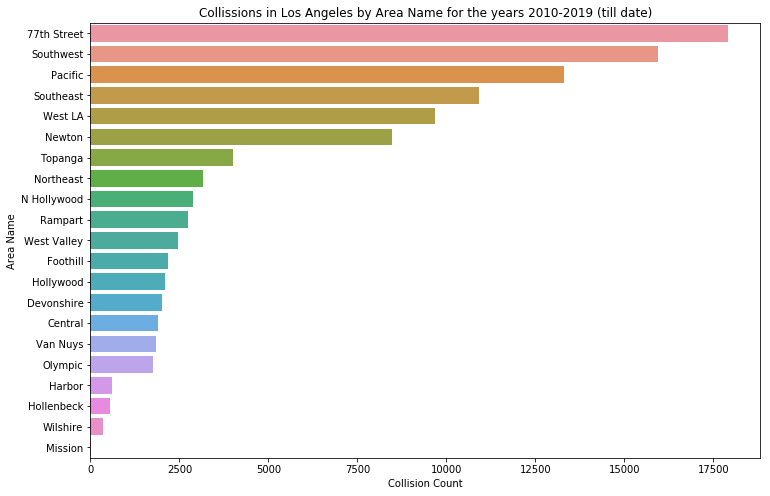

In [134]:
fig,ax = plt.subplots(figsize=(12,8))
descending_order = losAngelesdf['Area Name'].value_counts().sort_values(ascending=False).index
sns.countplot(y="Area Name",data=losAngelesdf, order = descending_order)
ax.set_title('Collissions in Los Angeles by Area Name for the years 2010-2019 (till date)');
plt.xlabel('Collision Count')
#plt.savefig('areaName.jpeg')

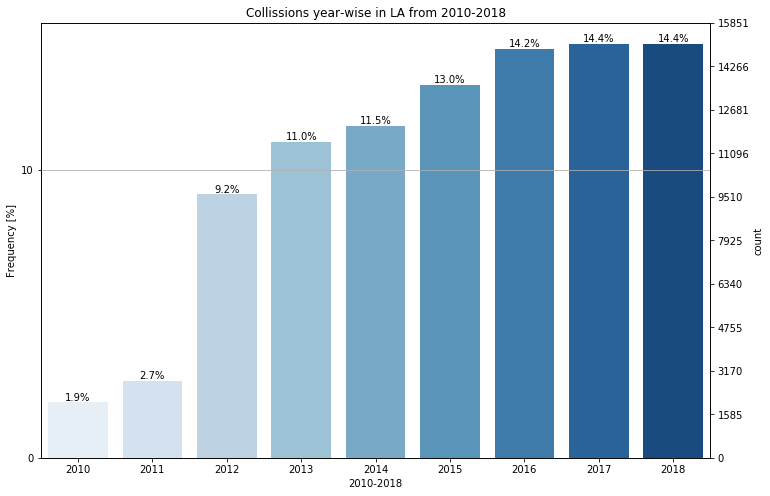

In [135]:
laYearWise = losAngelesdf[losAngelesdf['year']<2019] # Removing 2019 for being incomplete
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x = 'year',data = laYearWise,palette='Blues')
ax.set_title('Collissions year-wise in LA from 2010-2018');
plt.xlabel('2010-2018')
ncount = len(losAngelesdf)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
#ax2.set_ylim(0,100)
#ax.set_ylim(0,ncount)
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

#plt.savefig('yearwise.jpeg')

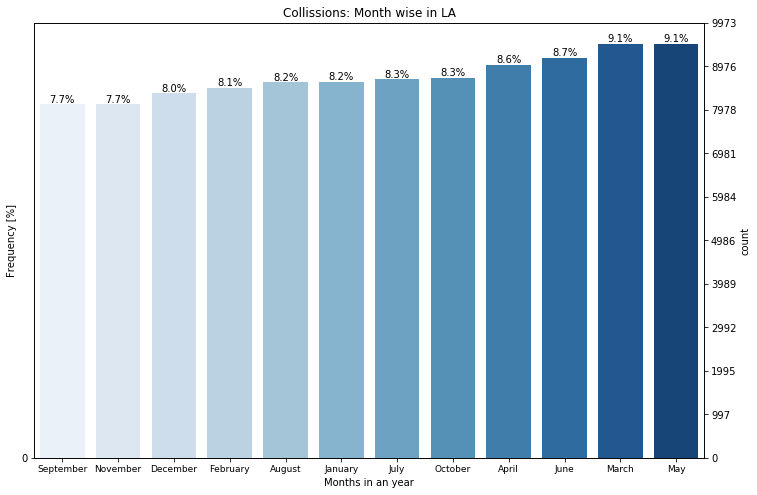

In [137]:
fig,ax = plt.subplots(figsize=(12,8))
ascending_order = losAngelesdf['month'].value_counts().sort_values(ascending=True).index
sns.countplot(x = 'month',data = losAngelesdf,order = ascending_order,palette='Blues')

ax.set_xticklabels(["September", "November", "December", "February", "August", "January", 
                    "July","October","April","June","March","May"], fontsize=9)
ax.set_title('Collissions: Month wise in LA');
plt.xlabel('Months in an year')
ncount = len(losAngelesdf)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
#ax2.set_ylim(0,100)
#ax.set_ylim(0,ncount)
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

plt.savefig('monthwise.jpeg')

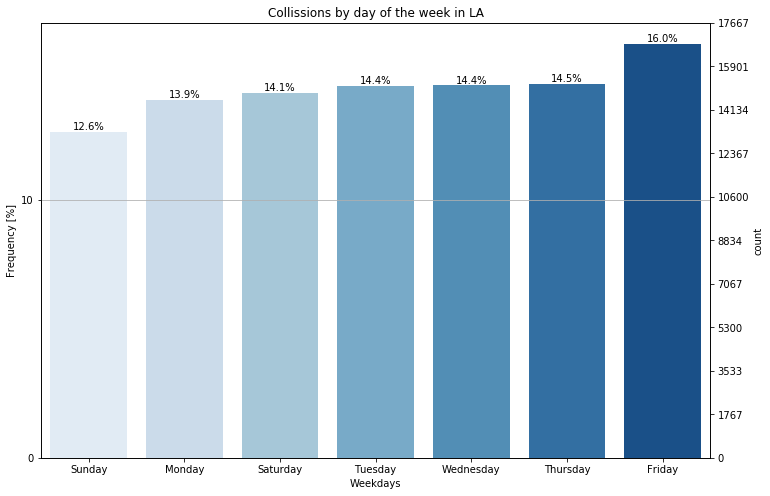

In [141]:
fig,ax = plt.subplots(figsize=(12,8))
ascending_order = losAngelesdf['weekday'].value_counts().sort_values(ascending=True).index
sns.countplot(x = 'weekday',data = losAngelesdf,order = ascending_order, palette='Blues')
ax.set_xticklabels(["Sunday", "Monday", "Saturday", "Tuesday", "Wednesday", "Thursday", "Friday"], fontsize=10)
ax.set_title('Collissions by day of the week in LA');
plt.xlabel('Weekdays')
ncount = len(losAngelesdf)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
#ax2.set_ylim(0,100)
#ax.set_ylim(0,ncount)
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

#plt.savefig('daywise.pdf')